<font color='blue'>Привет! Итак, первый модуль завершен, мы все глубже  проникаем в специализацию, теперь все серьезно ;) Меня зовут Алексей Алексеев, я проверю твой проект и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Пожалуйста, не удаляй эти комментарии, они понадобятся нам для дальнейшей работы над проектом. Кстати, сразу предлагаю общаться на "ты".  
Наличие критичного или трех и более некритичных замечаний является поводом для отправки проекта на доработку.  
    Некритичные замечания могут касаться нового материала, не освещенного в тренажере, но пожалуйста, не воспринимай их как мое необоснованное желание указать на твои ошибки. Изучать новый материал по ходу работы над проектом - это часть процесса обучения, на мой взгляд, очень эффективная. Так что не стесняйся задавать вопросы, если что-то не понятно. Наша общая цель - получить новые знания и навыки.     
А чтобы я точно не пропустил твои апдейты, желательно их также подсветить другим цветом, например, <font color='purple'>фиолетовым</font>.

---   
<font color='blue'>Апдейт после проверки: хороший проект, но давай внесем пару финальных штрихов.  
    Более подробно см. блок в конце.

</font>

# Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Импортировать файлы и изучить данные в них

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib as plt

flights = pd.read_csv('/datasets/query_1.csv')
flights.to_csv('flights.csv')
city = pd.read_csv('/datasets/query_3.csv')
city.to_csv('city.csv')

In [4]:
flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
flights.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [9]:
flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [10]:
city.duplicated().sum()

0

В таблице flights два столбца по 8 значений в них. Пропущенных значений и дубликатов нет. В таблице city также два столбца по 101 значению. Средни них также нет дубликатов и пропусков. 

<font color=green>Данные успешно загружены и изучены с применением верных методов. В этот раз с данными повезло, с ними действительно все в порядке.

<s><font color='brown'>Однако, даже в столь небольшом проекте, стоит подстраховаться и на этапе предобработки данных пробить сеты методом `describe`. Он позволит на самых ранних этапах обнаружить выбросы и прочие ошибки в данных, если таковые имеются.

<font color='purple'>Исправил данный пункт. Вывел на печать describe.</font>

<b>UPD: <font color='green'>Все реалистично, теперь мы уверены в своих данных на 100%.

## Проверить типы данных на корректность

In [11]:
city['average_flights'] = pd.to_numeric(city['average_flights'], downcast='float')

In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float32
dtypes: float32(1), object(1)
memory usage: 1.3+ KB


Изменил тип данных на float32, так как это позволит нам снизить количество испрльзуемой памяти.

<s><font color='brown'>Вот здесь не соглашусь. Ведь здесь речь не о полетах как таковых, а о *среднем количестве полетов в день*. Здесь вполне допустимо применять дробные числа.    
    Обрати внимание, у нас есть города, например с 1,4 полета в день. Округлив до двух, мы более, чем на треть увеличим показатель! Это может привести к неожиданным и неверным выводам. Лично я не вижу никакой проблемы в том, чтобы оперировать терминами типа "В среднем 3.87 полета в день".

<font color=blue>А тип в `average_fligts` действительно можно поменять - с `float64` на, например `float32`. Этого формата достаточно для хранения не астрономического размера данных с точностью до нескольких знаков. На большом датасете можно прилично сэкономить.  
        Кстати, можно доверить процесс определения минимально подходящего типа встроенным методам.     
Для этого применим downcast - автоматическое приведение данных к минимально возможному типу

    flight['average_flights'] = pd.to_numeric(flight['average_flights'], downcast='float')
    
Выполнив эти действия, ты сможешь убедиться, что тип столбца поменялся с float64 на float32, сэкономили половину памяти.

<font color='purple'>Круто! Насчет уменьшения памяти не знал, интересный момент. Исправил у себя код и вывод.</font>

<b>UPD: <font color='green'>Отлично. Для красоты можно округлить, например, до сотых.

## Выбрать топ-10 городов по количеству рейсов

In [13]:
city.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774200
70,Санкт-Петербург,31.161291
54,Новосибирск,17.322580
33,Красноярск,11.580646
20,Екатеринбург,11.322580
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612904
84,Ульяновск,9.580646


Среди городов в топ-10 по количеству рейсов неожиданно оказался Брянск, так как это не город миллионник, у него нет крупных агломераций вокруг, а также крупных промышленных или сельскохозяйственных предприятий.

<font color='blue'>Меня вот тоже этот факт удивляет.

## Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

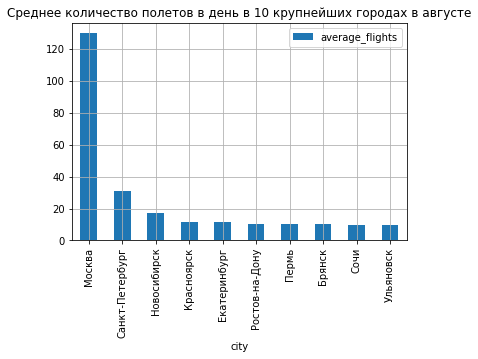

In [14]:
city.sort_values(by='average_flights', ascending=False).head(10).plot(x='city', y='average_flights', grid=True, kind='bar', title='Среднее количество полетов в день в 10 крупнейших городах в августе')

Резко выделяется Москва, так как является столицей и крепнейшим городом России. В среднем было 120 рейсов в августе. У городов Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Сочи, Ульяновск, Перьм, Брянск в среднем было от 10 до 17 рейсов в день в августе.

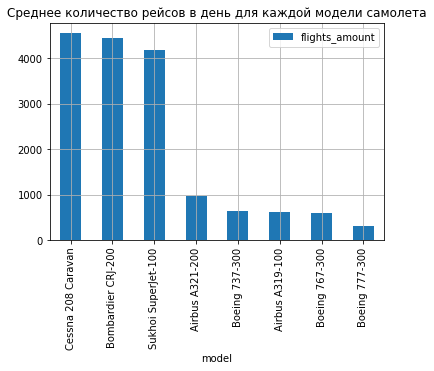

In [15]:
flights.sort_values(by='flights_amount', ascending=False).plot(x='model', y='flights_amount', grid=True, kind='bar', title='Среднее количество рейсов в день для каждой модели самолета')

Чаще всего в августе люди путешествовали на моделях самолетов: Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200. Данные самолеты являются ближнемагистральными, рассчитанными на полет до 3000 км. Соответственно, предназначены в рамках России на перелеты между рядом находящимися регионами. Также эти самолеты не рассчитаны на большой объем пассажиров (самых большой из них рассчитан на 100 человек). Чаще всего такие самолеты по информации с Википедии используются для чартерных и пассажирских пересозок. В отличие от остальных самолетов из списка данных самолеты намного меньше по размеру и дальности полетов.

<s><font color=brown>Интересный у нас топ-3. Что это вообще за самолеты, что они опережают Боинги и Эйрбасы? Предлагаю здесь немного углубиться в предметную область и попробовать предположить причину.  
    Мы, продуктовые аналитики, ценны в том числе тем, что можем не только разобрать и наглядно отобразить данные, но и тем, что можем объяснить причинно-следственные связи, что может в итоге привести к дальнейшим, очень полезным выводам.

<font color='purple'>Исправил вывод.</font>

<b>UPD: <font color='green'>Все очень логично - небольшие самолеты и летают чаще. 

In [16]:
other_city = city.query('average_flights < 9.58')

In [21]:
other_city_sort = other_city.sort_values(by='average_flights', ascending=False)
fig = px.bar(other_city_sort,
            y='city',
            x='average_flights',
            title='Города вне топ-10 по входящему трафику',
            text='average_flights',
            orientation='h',
            labels={'average_flights' : 'Среднее количество прилетов в день', 'city' : 'Город'})
# fig.update_traces(texttemplate='%{text:.0f}',
#                  textposition='outside')
# fig.update_layout(uniforntext_minsize=8,
#                  yaxis_range=[0, 10])
fig.show()

<font color='green'>Отличный интерактивный график! Без больших городов действительно нагляднее.

<s><font color='brown'>Однако в нем есть небольшая проблема. Не все названия городов влезают. Понимаю, городов много и хорошо такой график отобразить вряд ли возможно. Но иногда приходится отображать неотобразимое ;) Возможно, стоит попробовать отобразить бары горизонтально? (`orientation='h'` и поменять местами `x` и `y`) Тогда места для текста будет достаточно, да и читать горизонтальный текст удобнее.

Среди городов из не топ-10 по входящему трафику лидирует Сургут, Ханты-Мансийск. Стоит отметить, что среди лидирующих городов не из топ-10 в основном находятся крупнейшие города Сибири. Это можно объяснить тем, что в Сибири находятся крупнейшие промышленные предприятия России. Среди городов с наименьшими рейсами в день выделяются несколько городов (Усть-Кут, Грозный, Братск, Ярославль и другие).
В целом небольшое количество рейсов в городах можно объяснить тем, что крупные транспортные узлы находятся в Москве, Санкт-Петербурге, Самаре, Калининграде, Ростове-на-Дону, Нижнем Новгороде, Екатеринбурге, Новосибирске и Владивосток. Остальные рейсы распределены по остаточному принципу. 

<font color='green'>С данной логикой полностью согласен.

<font color='purple'>Исправил вывод графика.</font>

<b>UPD: <font color='blue'>Хорошо, но у нас по прежнему отображаются не все города. Чтобы это исправить, можно например вручную установить высоту графика - `height = 1000`

## Вывод

В рамках работы с базами данных получили вывод, что гипотезу о связи музыкальных фестивалей и спроса на авиабилеты проверить нельзя, так как выборка получилась небольшой. В рамках работы с таблицами получили неожиданные выводы о 10 самых больших городов по количеству рейсов за август 2018 года. Там появился небольшой город Брянск. Также стоит отметить среди самых больших городов на 11 месте город Советский. СТоит также выделить, что в основном рейсы совершались на 3 типах самолетов (Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200), больше 4000 рейсов на каждом из них. 

<s><font color='red'>У нас сделаны хорошие выводы, но должен заметить, что в любой, даже столь небольшой работе должен быть хотя бы коротенький *общий* вывод. Это "золотой стандарт" оформления проектов и нужно привыкать к подобному формату.  
 <font color='blue'>При желании в нем можно также упомянуть о части проекта, проделанной в тренажере.

<font color='purple'>В предыдущих работах всегда писал общий вывод. Здесь не стал, так как в задании было написано только про выводы к графикам. Но в дальнейшем учту, спасибо.</font>

<font color=blue>Итак, наши данные успешно изучены, по ним построены наглядные визуализации и сделаны выводы. Однако у меня есть пара мелких замечаний, давай над ними поработаем. Буду ждать доработанный проект.

<b>UPD: <font color='blue'>Вопросы сняты, принимаю работу. Успехов в следующем проекте, он будет не так прост, рекомендую быть повнимательнее на этапе тренажера.